# Predicting Diagnosis of Urinary Bladder Inflammation & Nephritis:
### Sklearn Implementation using Pipelines, Grid Search, and Ensemble Learning

Authors: Tiffany J Munn (tiffany.munn@du.edu)* and Tai Chen Ye (tai-chen.ye@du.edu)*

*University of Denver: Department of Computer Science and Engineering

Last Update: August 27th, 2020

Note:
Many functions used in the code below were repurposed from:
https://github.com/rasbt/python-machine-learning-book-3rd-edition Copyright (c) 2019 Sebastian Raschka

# Experimental Objective

### Dataset Description

Often diseases of the urinary bladder present similarly, and this can make an accurate diagnosis and subsequent treatment challenging for practitioners. 

Researchers at the Systems Research Institute-Polish Academy of Sciences-Laboratory of Intelligent Systems, were interested in building an algorithm that can successfully diagnosis the presence of acute bladder inflammation and acute nephritis. 

Acute bladder inflammation is a general diagnosis that presents with abdominal pain, pain with urination(micturition), and slightly increased temperatures. Often symptoms do subside on their own, but are likely to return, especially if the root cause of the inflammation was not found and addressed.

Acute nephritis happens when inflammation in the urinary system overtakes the kidneys. While it presents with similar symptoms as bladder inflammation, it also is associated with much higher temperatures, lumbar pain, nausea and vomiting. If left untreated, this condition can cause kidney failure.

While these two diseases can occur simultaneously, it is most important to be able to distinguish the presence of each disease individually in order to create the proper treatment plan. For example, inflammation is often a symptom of nephritis, but the presence of inflammation without nephritis requires further diagnostic testing to determine the cause of the inflammation. Further, nephritis can occur without a diagnosis of bladder inflammation, but of course still needs to be treated to prevent kidney failure.

These training examples were chosen because they represent the importance of distinguishing between similar diseases for proper treatment.  Accurate or inaccurate diagnoses can have a profound impact on a patient's health and therefore on our communities as a whole.

### UCI Machine Learning Repository Terms of Use

The source of our data-the UCI Machine Learning Repository, achives data and makes it openly available for others to download and use. While this site does not have a Terms of Use, per se, it does ask if you are to publish analysis done with UCI data that you include these citations.

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive diagnosis of urinary system diseases,
Artifical Inteligence and Security in Computing Systems, ACS'2002 9th International Conference Proceedings,
Kluwer Academic Publishers,2003, pp. 41-51

### Modeling Objectives

Dataset Attribute Information:

        a1 Temperature of patient { 35C-42C }
        a2 Occurrence of nausea { yes, no }
        a3 Lumbar pain { yes, no }
        a4 Urine pushing (continuous need for urination) { yes, no }
        a5 Micturition pains { yes, no }
        a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
        d1 decision: Inflammation of urinary bladder { yes, no }
        d2 decision: Nephritis of renal pelvis origin { yes, no }

While not specified by the authors, there are a few different ways to handle the outcome or target variables decision1 and decision2. One approach is to combine these decision variables into one target. That would result in the following categories:

        1: Positive Inflammation Only
        2: Positive Nephritis Only
        3: Positive Inflammation and Nephritis
        4: Negative for Inflammation and Nephritis

The second approach is to treat each decision variable as an individual target and test the features ability to distinguish the presence of inflammation and nephritis independently with binary classifiers (presence of disease or no presence of disease). One's approach here is dependent on the goal of the analysis. In our case, we are more interested in learning the features that diagnosis each disease separately. Thus, we will attempt to answer the following questions:

    1) What features successfully predict the presence or absence of bladder inflammation?
    2) What features successfully predict the presence or absence of Nephritis?

Thus, two y targets will be created, one targeting inflammation and one targeting nephritis.

Follow-up analysis will switch focus to finding features that distinguish between the multiple categories listed above. Stay tuned for that work!

Further details and a link to the archived data can be found here:
https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

# Data Preprocessing

### Minimial Data Preprocessing Before Pipeline Creations

Download and read in CSV data from the UCI Machine Learning Repository archive and read data as correct format without header.

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('diagnosis_data.data', encoding='utf-16', sep='\t', lineterminator='\r', header=None)

df

,0,1,2,3,4,5,6,7
0,"35,5",no,yes,no,no,no,no,no
1,"\n35,9",no,no,yes,yes,yes,yes,no
2,"\n35,9",no,yes,no,no,no,no,no
3,"\n36,0",no,no,yes,yes,yes,yes,no
4,"\n36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
116,"\n41,5",no,no,no,no,no,no,no
117,"\n41,5",yes,yes,no,yes,no,no,yes
118,"\n41,5",no,yes,yes,no,yes,no,yes
119,"\n41,5",no,yes,yes,no,yes,no,yes


In [2]:
# after reading in we see the last row is blank, remove
df=df.drop([120])

In [3]:
#renaming columns to be more descriptive

df=df.rename(columns={0: 'temp',1:'nausea',2:'lumbar_pain',3:'pushing',4: 'micturition', 5:'burning',\
                      6:'label_inflam', 7: 'label_nephr'})

#### Note that sklearn's pipeline API does not allow for transformation of target variables. Since our targets are in the format of string 'yes' and 'no' we must use a label encoder to create binary outcomes before procedding.

In [4]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
targets=['label_inflam', 'label_nephr']
for i in targets:
    df[i] = class_le.fit_transform(df[i])

df

,temp,nausea,lumbar_pain,pushing,micturition,burning,label_inflam,label_nephr
0,"35,5",no,yes,no,no,no,0,0
1,"\n35,9",no,no,yes,yes,yes,1,0
2,"\n35,9",no,yes,no,no,no,0,0
3,"\n36,0",no,no,yes,yes,yes,1,0
4,"\n36,0",no,yes,no,no,no,0,0
...,...,...,...,...,...,...,...,...
115,"\n41,4",no,yes,yes,no,yes,0,1
116,"\n41,5",no,no,no,no,no,0,0
117,"\n41,5",yes,yes,no,yes,no,0,1
118,"\n41,5",no,yes,yes,no,yes,0,1


### Create Train and Test Sets for Each Target Variable

In [5]:
from sklearn.model_selection import train_test_split

#creating our Xs and ys for train and test

#for inflammation

X, y_inflam = df.iloc[:, :-2].values, df.iloc[:, -2].values

X_train_inflam, X_test_inflam, y_train_inflam, y_test_inflam =\
    train_test_split(X, y_inflam, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_inflam)

# for nephr
# X is the same so just need to make y and then split
y_nephr = df.iloc[:, -1].values
X_train_nephr, X_test_nephr, y_train_nephr, y_test_nephr =\
    train_test_split(X, y_nephr,
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_nephr)


### Pipeline Creations

To begin, we create a custom transformer that cleans our data and a custom transformer than encodes the categorical features of our data. We then implement a standard scaler to all our feature data.  Lastly, we implement our four algorithims into their respective pipelines.

### Create Preprocessing Steps of Pipeline

In [6]:
import numpy as np 
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline

from sklearn.compose import ColumnTransformer

#to select only the columns that were in our dimensionality reduction
class ColumnExtractor(object):

    def __init__(self, cols):
        self.cols = cols

    def transform(self, X):
        col_list = []
        for c in self.cols:
            col_list.append(X[:, c:c+1])
        return np.concatenate(col_list, axis=1)

    def fit(self, X, y=None):
        return self
    
    
#Custom Transformer that cleans our numerical data
class Clean_Num( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self):
        return None
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        X[:,0]=np.char.replace([i for i in X[:,0]], '\n', '')
        X[:,0]=np.char.replace([i for i in X[:,0]], ',', '.')
        X[:,0] = X[:,0].astype(np.float)
        return X


numerical_index=[0]

categorical_indices=[1,2,3,4,5]


#ColumnTransformer allows us to specific which features are transformed
    
cleaner = ColumnTransformer(transformers=[('clean', Clean_Num(), numerical_index)], remainder='passthrough')

#encodes our binary feature data
encoder= ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), categorical_indices)], remainder='passthrough')


### Feature Selection for Each Target

[0.05471079 0.18295535 0.34666687 0.20171931 0.04132375 0.17262393]


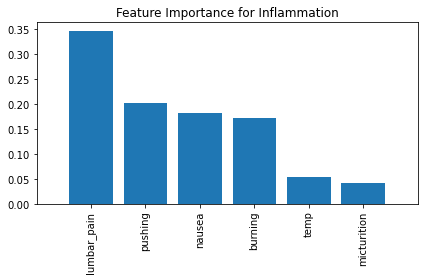

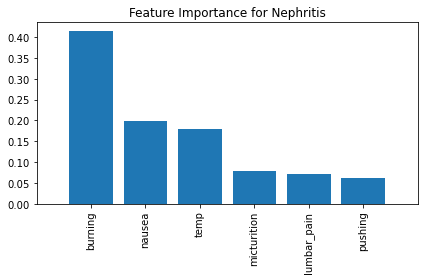

In [7]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#For Inflammation Target
feat_labels = df.columns[:-2]

pipe_select_inflam = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('scaler', StandardScaler()), 
                ('forest', RandomForestClassifier(n_estimators=500,random_state=1))])
                              
                              
pipe_select_inflam.fit(X_train_inflam, y_train_inflam)

                             
importances = pipe_select_inflam.steps[3][1].feature_importances_
print(importances)

indices = np.argsort(importances)[::-1]

plt.title('Feature Importance for Inflammation')
plt.bar(range(X_train_inflam.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_inflam.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_inflam.shape[1]])
plt.tight_layout()
plt.show()


#for nephritis
pipe_select_inflam.fit(X_train_nephr, y_train_nephr)

                             
importances = pipe_select_inflam.steps[3][1].feature_importances_

indices = np.argsort(importances)[::-1]

plt.title('Feature Importance for Nephritis')
plt.bar(range(X_train_inflam.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_inflam.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_inflam.shape[1]])
plt.tight_layout()
plt.show()

### Our Feature Subsets are as follows:

In [8]:
# list of features to use for inflammation
inflam_subset=['lumbar_pain', 'pushing','nausea', 'burning']

#let's get the corresponding indices
inflam_subset_ind=[]
for column in inflam_subset:
    index=df.columns.get_loc(column)
    inflam_subset_ind.append(index)
inflam_subset_ind=tuple(inflam_subset_ind)
print(f'subset indices for inflammation: {inflam_subset_ind}')

# list of features to use for nephritis
nephr_subset=['burning','nausea', 'temp', 'micturition']

#let's get the corresponding indices
nephr_subset_ind=[]
for column in nephr_subset:
    index=df.columns.get_loc(column)
    nephr_subset_ind.append(index)
nephr_subset_ind=tuple(nephr_subset_ind)
print(f'subset indices for nephritis: {nephr_subset_ind}')


subset indices for inflammation: (2, 3, 1, 5)
subset indices for nephritis: (5, 1, 0, 4)


### K-nearest Neighbor Model Pipeline

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#For Inflammation

pipe_knn_inflam = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('scaler', StandardScaler()), 
                ('dim_red', ColumnExtractor(cols=inflam_subset_ind)),
                ('knn', KNeighborsClassifier())])

## For nephrititis

pipe_knn_nephr = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('scaler', StandardScaler()), 
                ('dim_red', ColumnExtractor(nephr_subset_ind)),
                ('knn', KNeighborsClassifier())])

### Decision Tree  Model Pipeline

In [10]:
from sklearn.tree import DecisionTreeClassifier

#For Inflammation

#recall that for decision trees and random forests data does not need to be scaled

pipe_tree_inflam = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('dim_red', ColumnExtractor(cols=inflam_subset_ind)),
                ('tree', DecisionTreeClassifier(random_state=1))])

## For nephrititis

pipe_tree_nephr = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('dim_red', ColumnExtractor(cols=nephr_subset_ind)),
                ('tree', DecisionTreeClassifier(random_state=1))])

### Random Forest Model Pipeline

In [11]:
from sklearn.ensemble import RandomForestClassifier

#For Inflammation

pipe_forest_inflam = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('dim_red', ColumnExtractor(cols=inflam_subset_ind)),
                ('forest', RandomForestClassifier(random_state=1))])

## For nephrititis

pipe_forest_nephr = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('dim_red', ColumnExtractor(cols=nephr_subset_ind)),
                ('forest', RandomForestClassifier(random_state=1))])


### Stochastic Gradient Descent using SVM Model Pipeline

In [12]:
from sklearn.linear_model import SGDClassifier

#For Inflammation

pipe_sgd_inflam = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('scaler', StandardScaler()), 
                ('dim_red', ColumnExtractor(cols=inflam_subset_ind)),
                ('sgd', SGDClassifier(random_state=1))])

## For nephrititis

pipe_sgd_nephr = Pipeline(steps=[ 
                ('c', cleaner), ('e',encoder), 
                ('scaler', StandardScaler()), 
                ('dim_red', ColumnExtractor(cols=nephr_subset_ind)),
                ('sgd', SGDClassifier(random_state=1))])

# Implementing Grid Search in Our Pipeline Models

### K-nearest Neighbor Model for Inflammation

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import timeit

params={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'knn__metric':['chebyshev','minkowski','manhattan'] }

start = timeit.default_timer()
# Exhaustive search over specified parameter values for an estimator.
gs_knn_infl = GridSearchCV(pipe_knn_inflam, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_knn_infl.fit(X_train_inflam, y_train_inflam)

print(f'Best params from grid for inflammation: {gs_knn_infl.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_knn_infl.best_estimator_, X_train_inflam, y_train_inflam, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_knn_infl.best_estimator_, X_test_inflam, y_test_inflam, 
                         scoring='accuracy', cv=5)

stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Inflammation Target:',np.mean(scores_train))
print('Mean Testing accuracy for Inflammation Target:',np.mean(scores_test),'\n')
print('Run Time : ', run_time, 'ms')  

knn_inflam=[np.mean(scores_train),np.mean(scores_test),run_time]  

Best params from grid for inflammation: {'knn__metric': 'chebyshev', 'knn__n_neighbors': 1}
Mean Training accuracy for Inflammation Target: 1.0
Mean Testing accuracy for Inflammation Target: 1.0 

Run Time :  1.6362160809985653 ms


### K-nearest Neighbor Model for Nephritis

In [14]:
params={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'knn__metric':['chebyshev','minkowski','manhattan'] }

start = timeit.default_timer()

# Exhaustive search over specified parameter values for an estimator.
gs_knn_nephr = GridSearchCV(pipe_knn_nephr, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_knn_nephr.fit(X_train_nephr, y_train_nephr)

print(f'Best params from grid for nephritis: {gs_knn_nephr.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_knn_nephr.best_estimator_, X_train_nephr, y_train_nephr, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_knn_nephr.best_estimator_, X_test_nephr, y_test_nephr, 
                         scoring='accuracy', cv=5)
stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Nephritis Target:',np.mean(scores_train))
print('Mean Testing accuracy for Nephritis Target:',np.mean(scores_test),'\n')

print('Run Time : ', run_time, 'ms')  

knn_nephr=[np.mean(scores_train),np.mean(scores_test),run_time]  


Best params from grid for nephritis: {'knn__metric': 'chebyshev', 'knn__n_neighbors': 1}
Mean Training accuracy for Nephritis Target: 1.0
Mean Testing accuracy for Nephritis Target: 1.0 

Run Time :  1.684729270000389 ms


### Decision Tree  Model for Inflammation

In [15]:
from sklearn.tree import DecisionTreeClassifier

params={'tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'tree__criterion':['gini', 'entropy'] }

start = timeit.default_timer()

# Exhaustive search over specified parameter values for an estimator.
gs_tree_inflam = GridSearchCV(pipe_tree_inflam, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_tree_inflam.fit(X_train_inflam, y_train_inflam)

print(f'Best params from grid for inflammation: {gs_tree_inflam.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_tree_inflam.best_estimator_, X_train_inflam, y_train_inflam, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_tree_inflam.best_estimator_, X_test_inflam, y_test_inflam, 
                         scoring='accuracy', cv=5)


stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Inflammation Target:',np.mean(scores_train))
print('Mean Testing accuracy for Inflammation Target:',np.mean(scores_test),'\n')

print('Run Time : ', run_time, 'ms')  

tree_inflam=[np.mean(scores_train),np.mean(scores_test),run_time]  

Best params from grid for inflammation: {'tree__criterion': 'gini', 'tree__max_depth': 3}
Mean Training accuracy for Inflammation Target: 1.0
Mean Testing accuracy for Inflammation Target: 0.95 

Run Time :  0.7121441210001649 ms


### Decision Tree  Model for Nephritis

In [16]:
params={'tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'tree__criterion':['gini', 'entropy'] }

start = timeit.default_timer()
# Exhaustive search over specified parameter values for an estimator.
gs_tree_nephr = GridSearchCV(pipe_tree_nephr, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_tree_nephr.fit(X_train_nephr, y_train_nephr)

print(f'Best params from grid for nephritis: {gs_tree_nephr.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_tree_nephr.best_estimator_, X_train_nephr, y_train_nephr, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_tree_nephr.best_estimator_, X_test_nephr, y_test_nephr, 
                         scoring='accuracy', cv=5)


stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Nephritis Target:',np.mean(scores_train))
print('Mean Testing accuracy for Nephritis Target:',np.mean(scores_test),'\n')
print('Run Time : ', run_time, 'ms')  

tree_nephr=[np.mean(scores_train),np.mean(scores_test),run_time]  

Best params from grid for nephritis: {'tree__criterion': 'gini', 'tree__max_depth': 2}
Mean Training accuracy for Nephritis Target: 0.9882352941176471
Mean Testing accuracy for Nephritis Target: 0.9714285714285713 

Run Time :  0.6325188519986114 ms


### Random Forest Model for Inflammation

In [17]:
from sklearn.ensemble import RandomForestClassifier

params={'forest__n_estimators': [50, 100, 150], 'forest__criterion':['gini', 'entropy'] }

start = timeit.default_timer()

# Exhaustive search over specified parameter values for an estimator.
gs_f_inflam = GridSearchCV(pipe_forest_inflam, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_f_inflam.fit(X_train_inflam, y_train_inflam)

print(f'Best params from grid for inflammation: {gs_f_inflam.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_f_inflam.best_estimator_, X_train_inflam, y_train_inflam, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_f_inflam.best_estimator_, X_test_inflam, y_test_inflam, 
                         scoring='accuracy', cv=5)

stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Inflammation Target:',np.mean(scores_train))
print('Mean Testing accuracy for Inflammation Target:',np.mean(scores_test),'\n')
print('Run Time : ', run_time, 'ms')  

forest_inflam=[np.mean(scores_train),np.mean(scores_test),run_time]  


Best params from grid for inflammation: {'forest__criterion': 'gini', 'forest__n_estimators': 50}
Mean Training accuracy for Inflammation Target: 1.0
Mean Testing accuracy for Inflammation Target: 0.95 

Run Time :  6.722430608999275 ms


### Random Forest Model for Nephritis

In [18]:
from sklearn.ensemble import RandomForestClassifier

params={'forest__n_estimators': [50, 100, 150], 'forest__criterion':['gini', 'entropy'] }

start = timeit.default_timer()

# Exhaustive search over specified parameter values for an estimator.
gs_f_nephr = GridSearchCV(pipe_forest_nephr, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_f_nephr.fit(X_train_nephr, y_train_nephr)

print(f'Best params from grid for inflammation: {gs_f_nephr.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_f_nephr.best_estimator_, X_train_nephr, y_train_nephr, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_f_nephr.best_estimator_, X_test_nephr, y_test_nephr, 
                         scoring='accuracy', cv=5)
stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Nephritis Target:',np.mean(scores_train))
print('Mean Testing accuracy for Nephritis Target:',np.mean(scores_test),'\n')
print('Run Time : ', run_time, 'ms')  

forest_nephr=[np.mean(scores_train),np.mean(scores_test),run_time]  

Best params from grid for inflammation: {'forest__criterion': 'gini', 'forest__n_estimators': 50}
Mean Training accuracy for Nephritis Target: 0.9882352941176471
Mean Testing accuracy for Nephritis Target: 1.0 

Run Time :  7.404609699999128 ms


### Stochastic Gradient Descent for Inflammation

In [19]:
from sklearn.linear_model import SGDClassifier


params={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1], 'sgd__loss':["hinge", "squared_hinge", "modified_huber"],
       "sgd__penalty" : ["l2", "l1", "none"]}

start = timeit.default_timer()
# Exhaustive search over specified parameter values for an estimator.
gs_sgd_inflam = GridSearchCV(pipe_sgd_inflam, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_sgd_inflam.fit(X_train_inflam, y_train_inflam)

print(f'Best params from grid for inflammation: {gs_sgd_inflam.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_sgd_inflam.best_estimator_, X_train_inflam, y_train_inflam, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_sgd_inflam.best_estimator_, X_test_inflam, y_test_inflam, 
                         scoring='accuracy', cv=5)

stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Inflammation Target:',np.mean(scores_train))
print('Mean Testing accuracy for Inflammation Target:',np.mean(scores_test),'\n')
print('Run Time : ', run_time, 'ms')  

sgd_inflam=[np.mean(scores_train),np.mean(scores_test),run_time]  

Best params from grid for inflammation: {'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__penalty': 'l2'}
Mean Training accuracy for Inflammation Target: 1.0
Mean Testing accuracy for Inflammation Target: 0.95 

Run Time :  1.5348493929996039 ms


### Stochastic Gradient Descent for Nephritis

In [20]:
params={'sgd__alpha': [0.0001, 0.001, 0.01, 0.1], 'sgd__loss':["hinge", "squared_hinge", "modified_huber"],
       "sgd__penalty" : ["l2", "l1", "none"]}

start = timeit.default_timer()
# Exhaustive search over specified parameter values for an estimator.
gs_sgd_nephr = GridSearchCV(pipe_sgd_nephr, param_grid=params, scoring='accuracy', cv=5)


#fit the model
gs_sgd_nephr.fit(X_train_nephr, y_train_nephr)

print(f'Best params from grid for inflammation: {gs_sgd_nephr.best_params_}')


# Evaluate scores by cross-validation using the best_estimator
scores_train = cross_val_score(gs_sgd_nephr.best_estimator_, X_train_nephr, y_train_nephr, 
                         scoring='accuracy', cv=5)

scores_test = cross_val_score(gs_sgd_nephr.best_estimator_, X_test_nephr, y_test_nephr, 
                         scoring='accuracy', cv=5)

stop = timeit.default_timer()
run_time=stop-start

print('Mean Training accuracy for Nephritis Target:',np.mean(scores_train))
print('Mean Testing accuracy for Nephritis Target:',np.mean(scores_test),'\n')
print('Run Time : ', run_time, 'ms')  

sgd_nephr=[np.mean(scores_train),np.mean(scores_test),run_time]  

Best params from grid for inflammation: {'sgd__alpha': 0.0001, 'sgd__loss': 'hinge', 'sgd__penalty': 'l2'}
Mean Training accuracy for Nephritis Target: 1.0
Mean Testing accuracy for Nephritis Target: 1.0 

Run Time :  1.448790641999949 ms


In [21]:
data1 = {'SGD':sgd_inflam, 'Tree':tree_inflam, 'Random_Forest': forest_inflam,'KNN':knn_inflam  }
data2 = {'SGD':sgd_nephr, 'Tree':tree_nephr, 'Random_Forest': forest_nephr,'KNN':knn_nephr }

inflam_results = pd.DataFrame(data1,index=['Training accuracy', 'Testing accuracy', 'Running Time'])

Results for Inflammation Target


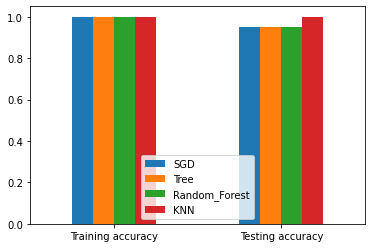

In [22]:
print(f'Results for Inflammation Target')
ax = inflam_results.drop(['Running Time'], axis=0).plot.bar(rot=0)

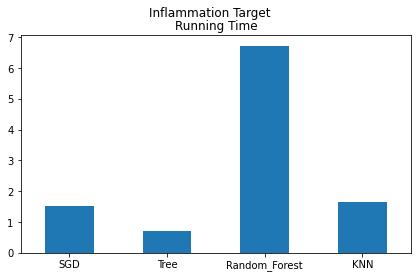

In [23]:
inflam_results.iloc[2,:].plot.bar(rot=0,subplots=True,figsize=(7,4), title='Inflammation Target');

In [24]:
nephr_results = pd.DataFrame(data2,index=['Training accuracy', 'Testing accuracy', 'Running Time'])

Results for Nephritis Target


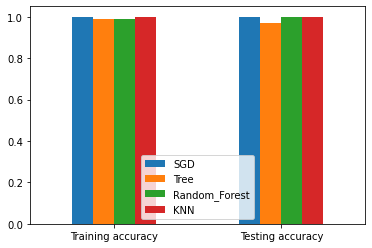

In [25]:
print(f'Results for Nephritis Target')
ax = nephr_results.drop(['Running Time'], axis=0).plot.bar(rot=0)

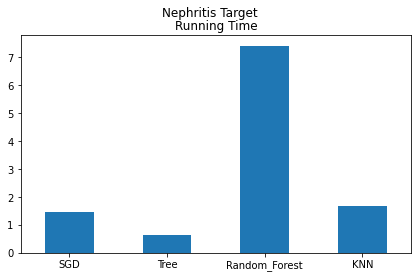

In [26]:
nephr_results.iloc[2,:].plot.bar(rot=0,subplots=True,figsize=(7,4), title='Nephritis Target');

# Demonstrating a Confusion Matrix

### K-nearest Neighbor Model

Confusion Matrix for Inflammation Taraget


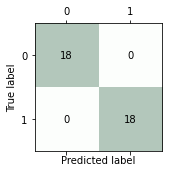

Confusion Matrix for Nephritis Taraget


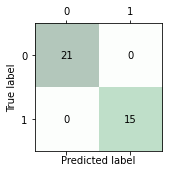

In [27]:
from sklearn.metrics import confusion_matrix

# for Inflammation

y_pred= gs_knn_infl.best_estimator_.predict(X_test_inflam)
con_m=confusion_matrix(y_test_inflam,y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(con_m, cmap=plt.cm.Greens, alpha=0.3)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j, y=i, s=con_m[i, j], va='center', ha='center')

print('Confusion Matrix for Inflammation Taraget')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()


# for Nephritits

y_pred= gs_knn_nephr.best_estimator_.predict(X_test_nephr)
con_m=confusion_matrix(y_test_nephr,y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(con_m, cmap=plt.cm.Greens, alpha=0.3)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j, y=i, s=con_m[i, j], va='center', ha='center')

print('Confusion Matrix for Nephritis Taraget')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

Note: for all models and both targets the confusion matrix produced was the same as the one shown here for KNN. Thus, only one is displayed.

# Implementing An Ensemble with MajorityVoteClassifier

Function below repurposed from:
https://github.com/rasbt/python-machine-learning-book-3rd-edition Copyright (c) 2019 Sebastian Raschka

In [28]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='classlabel')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        y : array-like, shape = [n_examples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_examples, n_classes]
            Weighted average probability for each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    #this section might be useful for getting grid search params

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

### Using MajorityVoteClassifier on Our Data

#### For Inflammation Target

Since, the implementation of roc_auc score does not easily support SGD with SVM, we decided to use recall as our scoring method. With this data, it is better for a practitioner to handle False Positives by doing differential diagonis than have a false negative that could led to kidney failure. In addition, the treatments for both diseases have very little side effects even if the patient was a False Postive. 

In [29]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe_knn_inflam, pipe_tree_inflam, pipe_forest_inflam, pipe_sgd_inflam])

clf_labels = ['KNN', 'Tree', 'Forest', 'SGD','Majority voting']
all_clf = [pipe_knn_inflam, pipe_tree_inflam, pipe_forest_inflam, pipe_sgd_inflam, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_inflam,
                             y=y_train_inflam,
                             cv=10,
                             scoring='recall')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 1.00 (+/- 0.00) [KNN]
ROC AUC: 1.00 (+/- 0.00) [Tree]
ROC AUC: 1.00 (+/- 0.00) [Forest]
ROC AUC: 1.00 (+/- 0.00) [SGD]
ROC AUC: 1.00 (+/- 0.00) [Majority voting]


In [30]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe_knn_inflam, pipe_tree_inflam, pipe_forest_inflam, pipe_sgd_inflam])

clf_labels = ['KNN', 'Tree', 'Forest', 'SGD','Majority voting']
all_clf = [pipe_knn_nephr, pipe_tree_nephr, pipe_forest_nephr, pipe_sgd_nephr, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train_nephr,
                             y=y_train_nephr,
                             cv=10,
                             scoring='recall')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

ROC AUC: 1.00 (+/- 0.00) [KNN]
ROC AUC: 0.97 (+/- 0.07) [Tree]
ROC AUC: 0.97 (+/- 0.07) [Forest]
ROC AUC: 1.00 (+/- 0.00) [SGD]
ROC AUC: 0.97 (+/- 0.07) [Majority voting]


### Overall Experiment Summary

We used archived data downloaded from the UCI machine learning repository containing features and outcomes for two diseases of the urinary bladder: acute inflammation acute nephritis. Data was preprocessed by label encoding all binary features and then standardizing all input features. 

Due to the nature of the data (1 continuous feature and 5 binary features) we were limited with traditional parametric methods. Therefore, we choose models robust to non-linear features: k-nearest neighbors, decision tree, random forest, and SGD (SVM implementation). To find the best parameters, a grid search was completed for each algorithm. With the best model chosen, the following were calculated: accuracy score and running time. This process was completed for both target variables.

The following are the best parameters for each algorithm:

Target: Inflammation

    KNN:{'metric': 'chebyshev', 'n_neighbors': 1}
    Decision Tree: {'criterion': 'gini', 'max_depth': 3}
    Random Forest: {'criterion': 'gini', 'n_estimators': 50}
    SGD(SVM): {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}

Target: Nephritis

    KNN: {'metric': 'chebyshev', 'n_neighbors': 1}
    Decision Tree: {'criterion': 'gini', 'max_depth': 2}
    Random Forest: {'criterion': 'gini', 'n_estimators': 50}
    SGD(SVM: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
    
    
Overall, all models performed well but KNN seems to be the best choice when considering run-time. If computational cost is not an issue, random forest would also be a great choice. Thankfully, we were able to model the data how we had hoped. Other graduate students had published previous work on this dataset and we were able to read their publication as guidance and explore areas they had not. 

Here is how our work differs from this publication:
1. Prior work had combined the two outcome variables; we analyzed them separately for interpretability.
2. Prior work did not use nested cross-validation (they use hold-out cross-validation)
3. Either prior work did not use grid search to find best parameters (as we did) or simply did not mention it in their paper.
3. While prior work did use variations of KNN, our grid search's best result produced a different parameters(metric=chebyshev) than any of their variations(Euclidean, Manhattan, Cosine, Correlation).
4. While prior work used variations of SVM, SGD (stochastic gradient descent) was not implemented in any of those variations as we did.

Finally, what did we learn? First, we learned that the best features for identifying the presence of inflammation ('lumbar_pain', 'pushing', 'nausea', 'burning') were not exactly the same as those for identifying nephritis ('burning', 'nausea','temp', ''micturition'). This result supports the notion that these two target variables should be analyzed separately, depending on the application, of course.

What was most surprising was the best parameter finding for KNN. The prior work had not even tried the chebyshev metric, and yet we found this metric to be the best. While adding the run-times was not required, it was a great learning tool as we were able to see the computational cost of random forests as compared to other algorithms. Overall, this project was a great tool for learning how to implement grid search and cross validation, as well as an opportunity to expand among previous machine learning research published on this data.